## Data annotation with k-means clustering ##

Structured data can be annotated using unsupervised learning. Here we will see how it can be done using the famous data set Anderson's Iris.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
#sklearn 
import sklearn
from sklearn.cluster import KMeans 
from sklearn.preprocessing import scale 
import sklearn.metrics as sm 
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report

Define visualization parameters.

In [2]:
%matplotlib inline 
rcParams["figure.figsize"] =20,10

We use the scaled the data set.

In [3]:
iris = datasets.load_iris()

data = scale(iris.data) 
target = pd.DataFrame(iris.target)  
variable_names = iris.feature_names
data[0:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

We classify the data into clusters using sklearn. The parameteres we use depend on the task we want the model to do. In this data set there are data for three Iris flowers so we want to split the data into three clusters. random_state parameter for k-means is used to have the means of reproducing the results later.

In [16]:
clustering = KMeans(n_clusters=3,random_state=5)
clustering.fit(data)

iris_df = pd.DataFrame(iris.data)
iris_df.columns = ["sepal_length","sepal_width","petal_length","petal_width" ]
target.columns =["Target"]

iris_df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Text(0.5, 1.0, 'K means Classifcation')

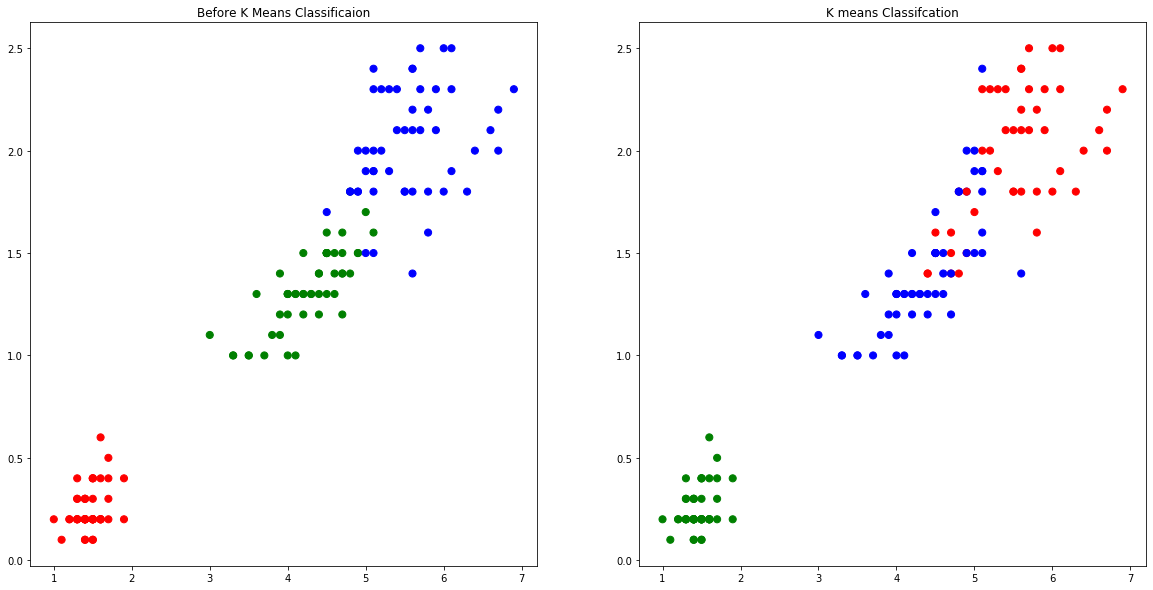

In [5]:
colors = np.array(["Red","Green","Blue"])
plt.subplot(1,2,1)
plt.scatter(x=iris_df["petal_length"] ,y= iris_df["petal_width"],c = colors[iris.target],s=50)
plt.title("Before K Means Classificaion")

plt.subplot(1,2,2)
plt.scatter(x=iris_df["petal_length"] ,y= iris_df["petal_width"],c = colors[clustering.labels_],s=50)
plt.title("K means Classifcation")

On the plots we can see that the model fit is accurate, but the labels are not the same as in the original data set. We solve that with a simple label switch in the predicted labels.

Text(0.5, 1.0, 'K means Classifcation')

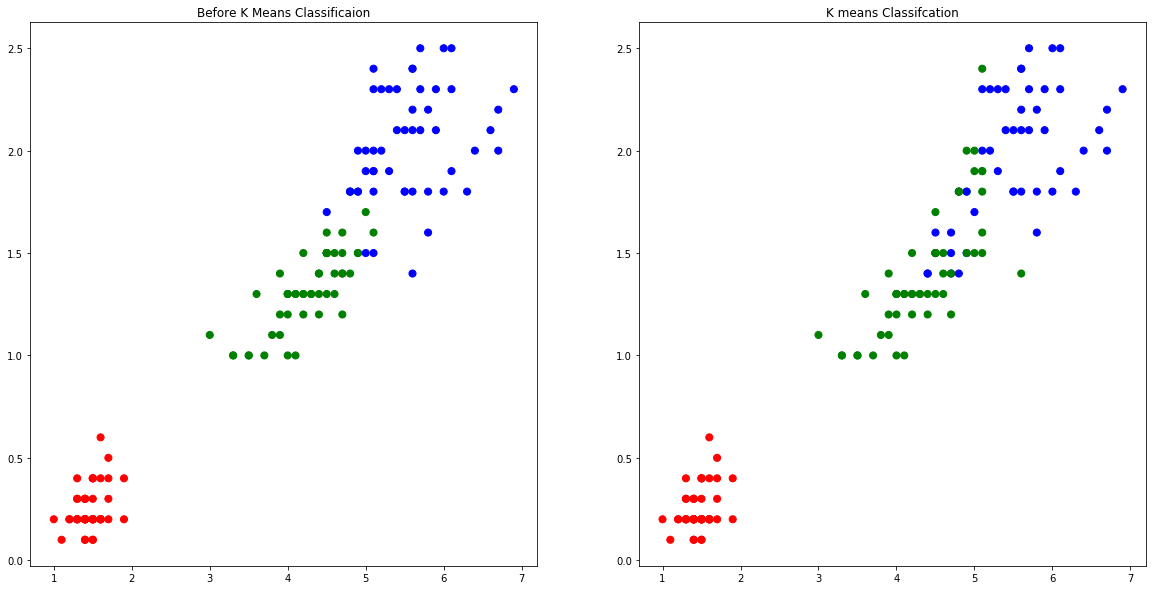

In [6]:
relabel = np.choose(clustering.labels_,[2,0,1]).astype(np.int64)
colors = np.array(["Red","Green","Blue"])
plt.subplot(1,2,1)
plt.scatter(x=iris_df.petal_length ,y= iris_df.petal_width,c = colors[iris.target],s=50)
plt.title("Before K Means Classificaion")

plt.subplot(1,2,2)
plt.scatter(x=iris_df.petal_length ,y= iris_df.petal_width,c = colors[relabel],s=50)
plt.title("K means Classifcation")

As we can see, precision and recall are satisfactory.

In [7]:
print(classification_report(target,relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



### An example of using OpenCV for manual image annotation. This example works when run on PythonShell. ###

In [ ]:
import cv2 as cv

imageread = cv.imread('img.jpg')
imagedraw = cv.selectROI(imageread)

croppedimage = imageread[int(imagedraw[1]):int(imagedraw[1]+imagedraw[3]), int(imagedraw[0]):int(imagedraw[0]+imagedraw[2])]

cv.imshow('Cropped_image',croppedimage)
cv.waitKey(0)
cv.destroyAllWindows()